Problem Statement: You are provided with a dataset containing the historical data of
various digital marketing campaigns. This dataset comprises both the performance
metrics (like impressions, engagements, spends, etc.) and creative attributes (such as
Headline, CTA, Hero image, Offer, etc.) of each campaign.

Notebook by- AKASH SINGH

Installing Dependencies

In [7]:
#pip install seaborn 
#pip install vaderSentiment
#pip install xgboost

Importing Dependencies

In [8]:
# data analysis and wrangling
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


Performing the EDA-
Data Loading:

In [9]:
filename= (r"C:\Users\akash\OneDrive\Documents\College\Projects\Social Media\Socialmedia_Train.csv")
df= pd.read_csv(filename)
new_data = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\College\Projects\Social Media\Socialmedia_Test.csv")

Data Exploration:

In [10]:
df.shape

(1054, 57)

In [11]:
df.head()

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,05-09-2023,schneider-electric,5.85,479,31,0,2,33,7,Post,...,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,01-09-2023,schneider-electric,1.80,3880,224,1,9,234,0,Post,...,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,04-09-2023,schneider-electric,2.32,785,55,1,16,72,11,Post,...,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,04-09-2023,schneider-electric,3.94,658,54,1,5,60,8,Post,...,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,04-09-2023,schneider-electric,3.89,2568,168,1,5,174,25,Post,...,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40


In [12]:
df.describe()

,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,213.192998,15075.879507,197.481973,2.911765,11.707780,212.101518,34.914611,0.777989,0.644928,1.817837,12.695187,4.379151,68.045541,1.214036,0.117452,0.861480,13.327576,7.204507
std,1253.414372,67763.338279,343.418407,8.764124,19.993921,360.599591,61.291577,1.899180,1.900660,2.688484,22.180729,11.035399,182.270990,6.813438,1.089433,1.910578,25.736842,19.542672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.615000,803.750000,33.000000,0.000000,1.000000,34.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.645000,2577.000000,98.500000,0.000000,5.000000,110.000000,13.500000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.475000
75%,87.315000,7612.250000,220.000000,2.000000,14.000000,241.000000,39.750000,1.000000,0.000000,3.000000,18.135837,2.490360,101.750000,0.780377,0.000000,1.000000,18.333088,9.200000
max,23039.110000,961453.000000,6130.000000,111.000000,193.000000,6291.000000,589.000000,10.000000,26.340476,10.000000,99.149411,92.711892,3669.000000,75.250000,30.739978,10.000000,161.275964,366.900000


In [13]:
column_data_types = df.dtypes
categorical_columns = []
numerical_columns = []
for column_name, data_type in column_data_types.items():
    if data_type == 'object' or data_type.name == 'category':
        categorical_columns.append(column_name)
    else:
        numerical_columns.append(column_name)

print(numerical_columns)
print(categorical_columns)

['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion', 'number of faces', 'face area percentage %', 'number of objects', 'primary object area percentage %', 'secondary object area percentage %', 'text length', 'logo 1 area percentage %', 'logo 2 area percentage %', 'number of persons', 'person area', 'text area %']
['date', 'company name', 'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl', 'sharedposturl', 'created_at', 'size', 'url', 'face emotion', 'face position', 'objects', 'primary object', 'primary object position', 'secondary object', 'secondary object position', 'text', 'dominant colour', 'cta', 'logos', 'logo 1 name', 'logo 1 position', 'logo 2 name', 'logo 2 position', 'person area %', 'style', 'tone', 'voice', 'sentiment', 'empty space %', 'topic', 'language', '# faces', '# persons', '# objects', '# text length']


In [14]:
df['company name'].value_counts()

company name
rockwell-automation    322
vertiv                 259
schneider-electric     244
ge                      81
siemens                 57
johnson-controls        56
abb                     18
honeywell               17
Name: count, dtype: int64

In [15]:
df.groupby('company name').mean('numerical_columns')

,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
company name,,,,,,,,,,,,,,,,,,
abb,533.942778,59342.111111,747.500000,11.944444,37.444444,796.888889,136.722222,0.055556,0.300671,1.555556,8.596307,10.986207,71.000000,0.302189,0.070044,0.166667,10.389048,6.794444
ge,607.536914,42449.296296,642.370370,7.679012,20.000000,670.049383,103.296296,1.444444,1.471744,2.617284,32.252994,8.163725,68.580247,1.917646,0.543645,1.345679,20.586740,6.362346
honeywell,583.747647,47426.588235,447.941176,9.294118,34.352941,491.588235,93.352941,0.411765,0.683269,2.176471,14.448391,5.928061,24.882353,0.697124,0.000000,0.470588,10.954903,1.817647
johnson-controls,205.836429,19607.767857,264.589286,3.303571,17.517857,285.410714,49.642857,1.178571,1.344789,2.357143,18.329773,7.719350,71.517857,0.811113,0.000000,1.267857,16.346074,6.828571
rockwell-automation,126.556273,8247.586957,103.347826,2.183230,12.826087,118.357143,20.229814,0.878882,0.534505,2.226708,12.448674,4.215481,97.503106,2.162999,0.035536,0.968944,18.589284,11.142236
schneider-electric,116.689221,8847.889344,194.577869,2.836066,10.331967,207.745902,34.586066,0.672131,0.748174,1.491803,11.238864,4.726713,56.717213,0.427042,0.218164,0.721311,12.923820,5.504713
siemens,726.965439,50485.947368,461.105263,5.912281,20.315789,487.333333,74.859649,0.736842,1.216296,2.228070,18.031339,4.879222,45.947368,0.196620,0.000000,0.754386,14.643033,4.364035
vertiv,130.398031,6898.965251,50.922780,0.606178,2.594595,54.123552,9.208494,0.540541,0.170707,1.154440,6.034243,1.678503,48.667954,0.963941,0.053374,0.718147,4.313932,5.262162


Handling Missing Data:

In [16]:
df.isnull().sum()

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

In [17]:
df.duplicated().sum()

0

Analyze by visualizing data

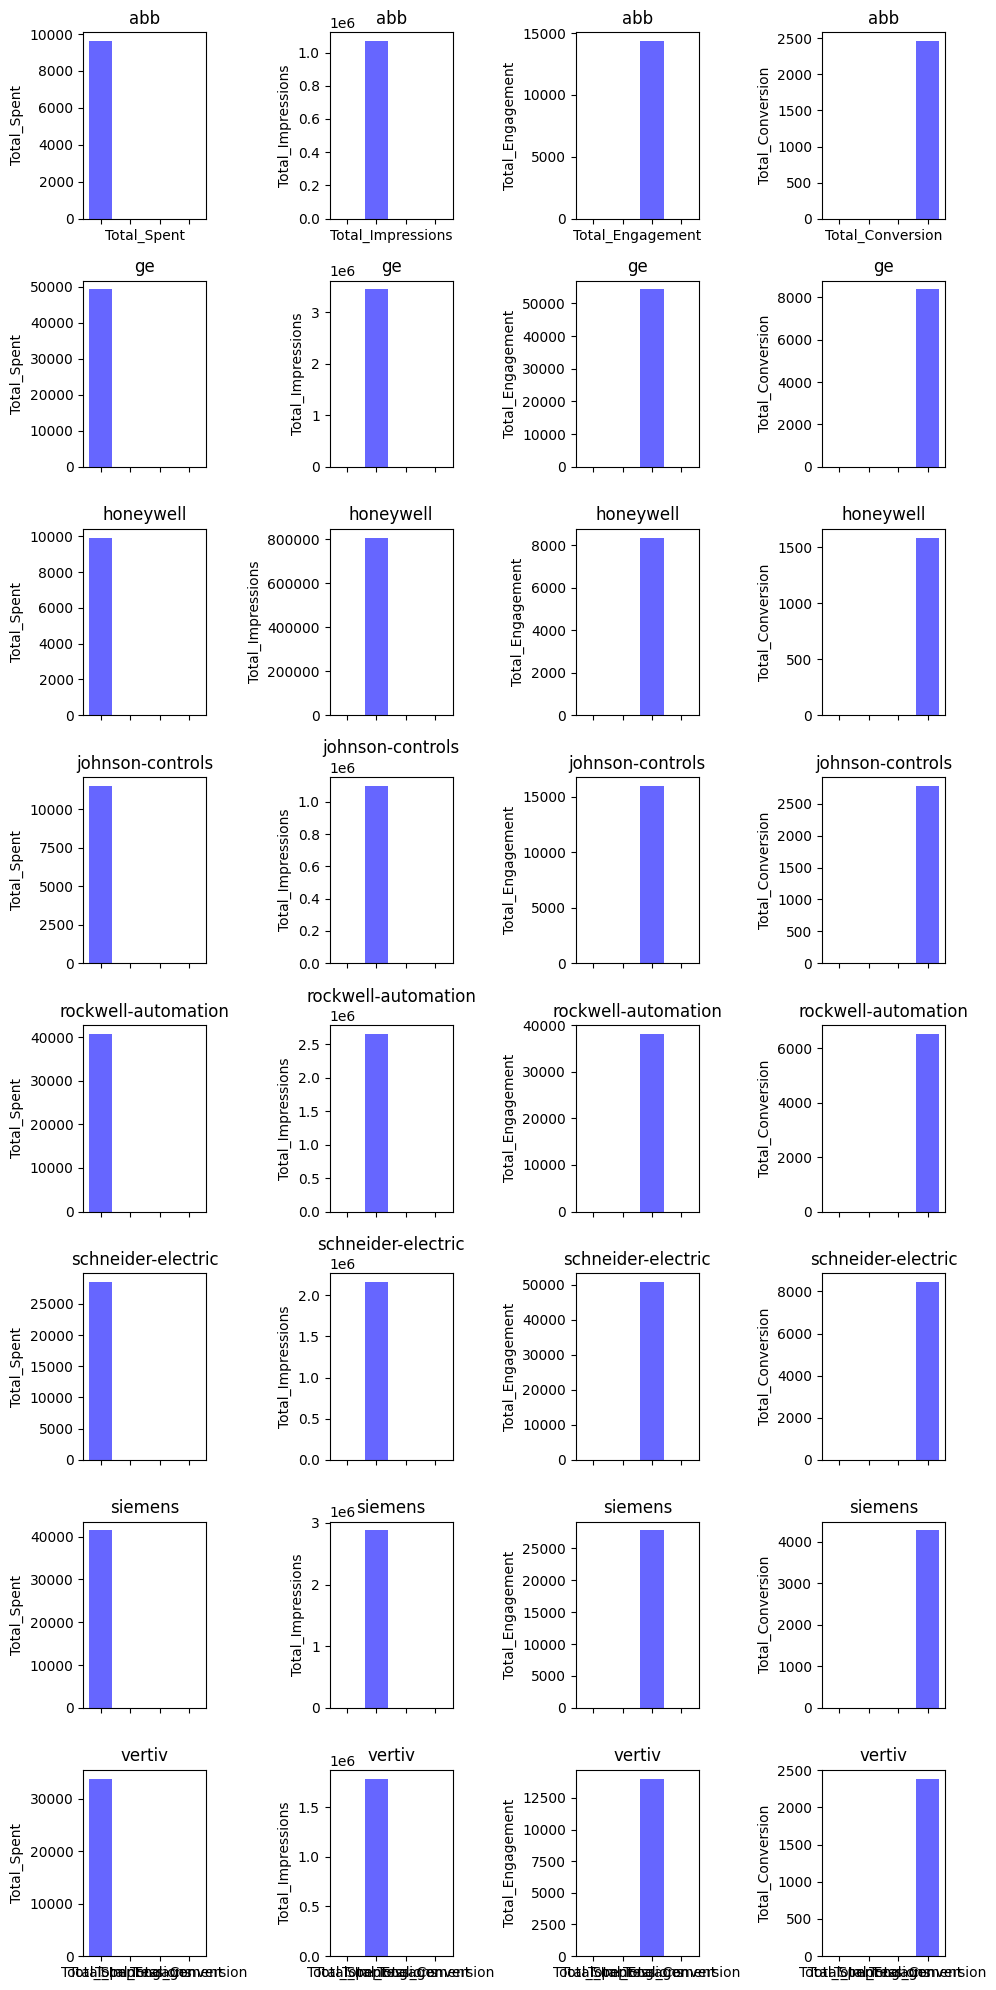

In [18]:
engagement_by_company = df.groupby('company name').agg(
    Total_Impressions=('impressions', 'sum'),
    Total_Engagement=('total engagements', 'sum'),
    Total_Conversion=('conversion', 'sum'),
    Conversion_Rate=('conversion', 'mean'),
    Total_Spent=('spend','sum')
).reset_index()

company_engagement_summary = engagement_by_company[['company name', 'Total_Impressions', 'Total_Engagement','Total_Conversion', 'Conversion_Rate','Total_Spent']]

companies = company_engagement_summary['company name']
metrics = ['Total_Spent','Total_Impressions', 'Total_Engagement', 'Total_Conversion']

fig, axes = plt.subplots(len(companies), len(metrics), figsize=(10, 20), sharex=True)

for i, company in enumerate(companies):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        data = company_engagement_summary[company_engagement_summary['company name'] == company]
        ax.bar(metric, data[metric].values[0], color='b', alpha=0.6)
        ax.set_title(f'{company}')
        ax.set_ylabel(metric)


for j, metric in enumerate(metrics):
    axes[0, j].set_xlabel(metric)

plt.tight_layout()
plt.show()

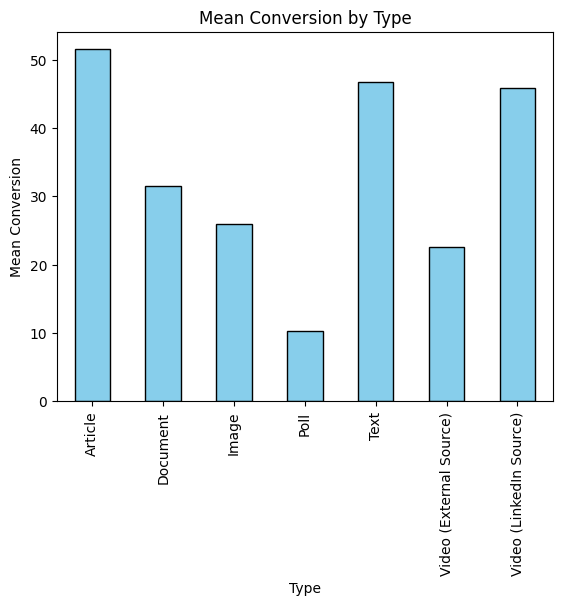

In [19]:


conversion_mean_by_type = df.groupby('type')['conversion'].mean()

conversion_mean_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Conversion by Type')
plt.xlabel('Type')
plt.ylabel('Mean Conversion')
plt.show()


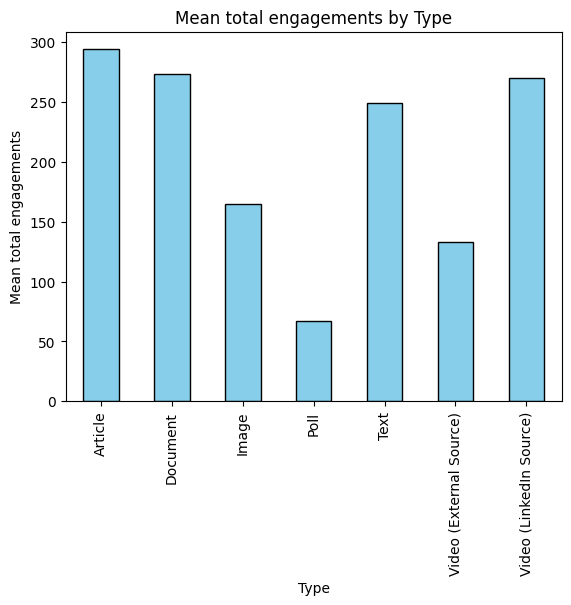

In [20]:

en_mean_by_type = df.groupby('type')['total engagements'].mean()

en_mean_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean total engagements by Type')
plt.xlabel('Type')
plt.ylabel('Mean total engagements')
plt.show()

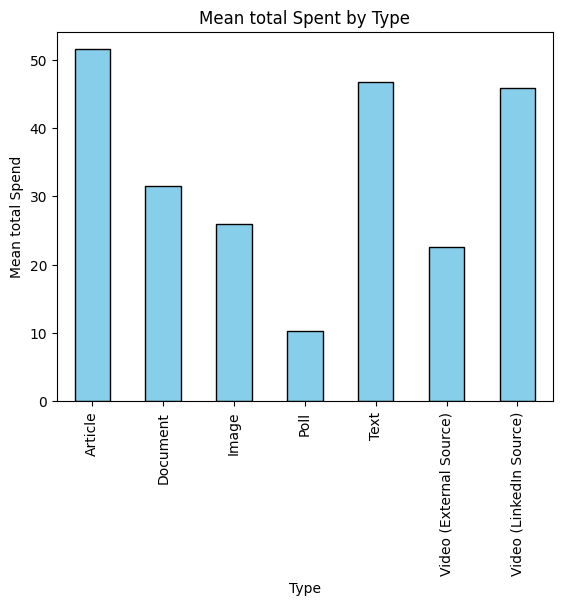

In [21]:

spend_mean_by_type = df.groupby('type')['spend'].mean()

conversion_mean_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean total Spent by Type')
plt.xlabel('Type')
plt.ylabel('Mean total Spend')
plt.show()

By using merged bar plot we can analize the total values of the target variables, grouped according to the companies 

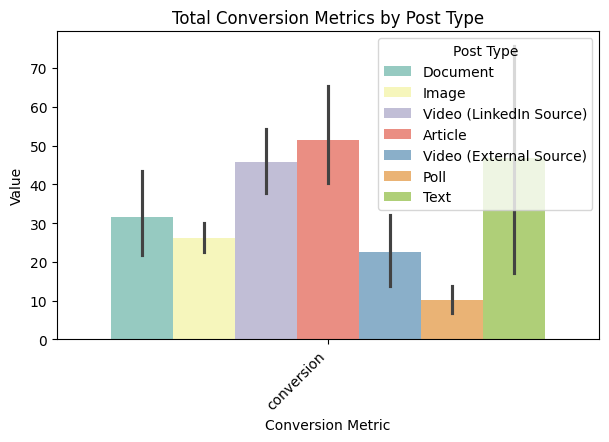

In [22]:
df_melted = pd.melt(df, id_vars=['type'], value_vars=['conversion'], var_name='Conversion Metric', value_name='Value')


plt.figure(figsize=(7, 4))
sns.barplot(x='Conversion Metric', y='Value', hue='type', data=df_melted, palette='Set3')
plt.xlabel('Conversion Metric')
plt.ylabel('Value')
plt.title('Total Conversion Metrics by Post Type')
plt.legend(title='Post Type')
plt.xticks(rotation=45, ha='right')
plt.show()

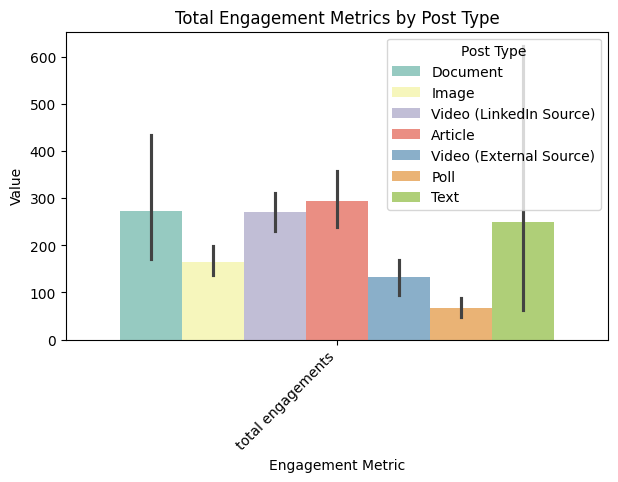

In [23]:
df_melted = pd.melt(df, id_vars=['type'], value_vars=['total engagements'], var_name='Engagement Metric', value_name='Value')


plt.figure(figsize=(7, 4))
sns.barplot(x='Engagement Metric', y='Value', hue='type', data=df_melted, palette='Set3')
plt.xlabel('Engagement Metric')
plt.ylabel('Value')
plt.title('Total Engagement Metrics by Post Type')
plt.legend(title='Post Type')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see how well various types of posts correlate to the total engagements 

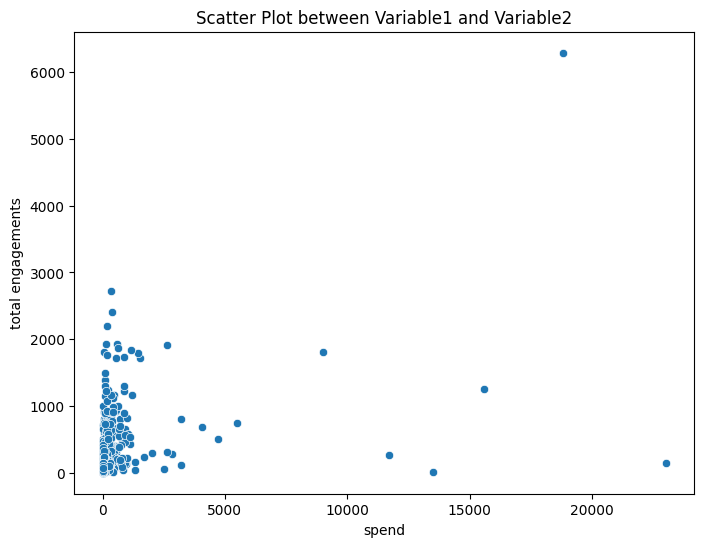

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='spend', y='total engagements', data=df)
plt.title('Scatter Plot between Variable1 and Variable2')
plt.show()

In [25]:
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Print the list of numerical columns
print("Numerical Columns (excluding non-numeric types):")
print(numerical_columns)

Numerical Columns (excluding non-numeric types):
Index(['spend', 'impressions', 'likecount', 'commentcount', 'repostcount',
       'total engagements', 'conversion', 'number of faces',
       'face area percentage %', 'number of objects',
       'primary object area percentage %',
       'secondary object area percentage %', 'text length',
       'logo 1 area percentage %', 'logo 2 area percentage %',
       'number of persons', 'person area', 'text area %'],
      dtype='object')


The plot indicates a strong positive correlation. This means that as the value of one variable increases, the value of the other variable also tends to increase.

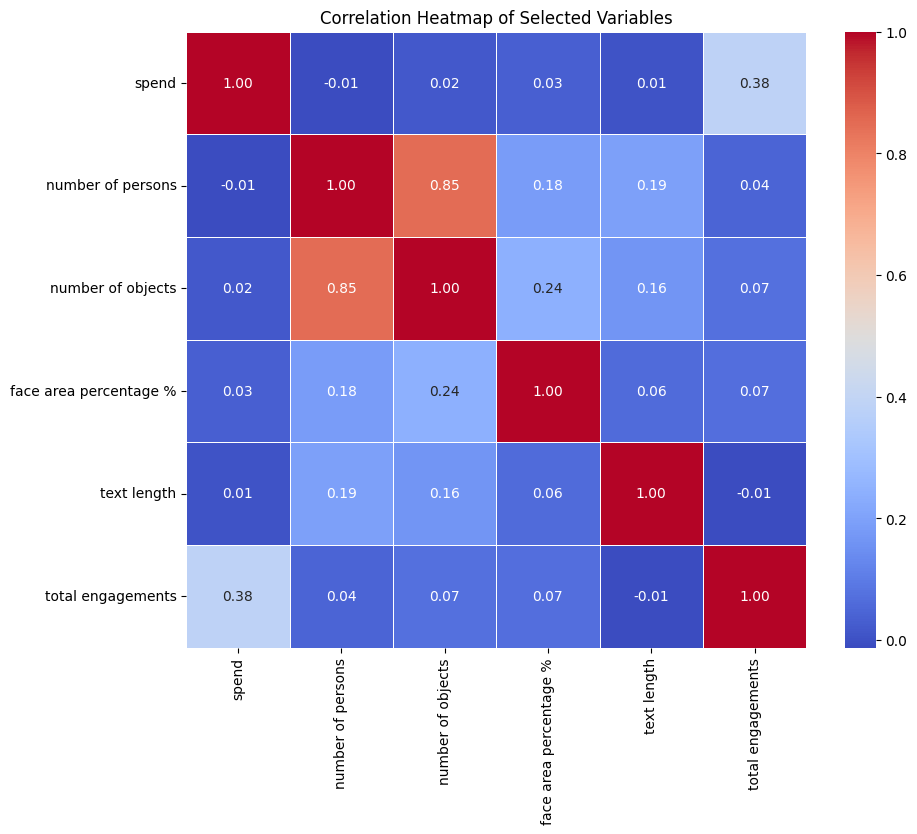

In [26]:
selected_columns = ['spend','number of persons', 'number of objects', 'face area percentage %', 'text length', 'total engagements']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Selected Variables')

plt.show()

We can see number of objects and number of people are correlating however these do no have much effect on total engagements however spend is an important feature of Total Engagements 

Outlier Detection 

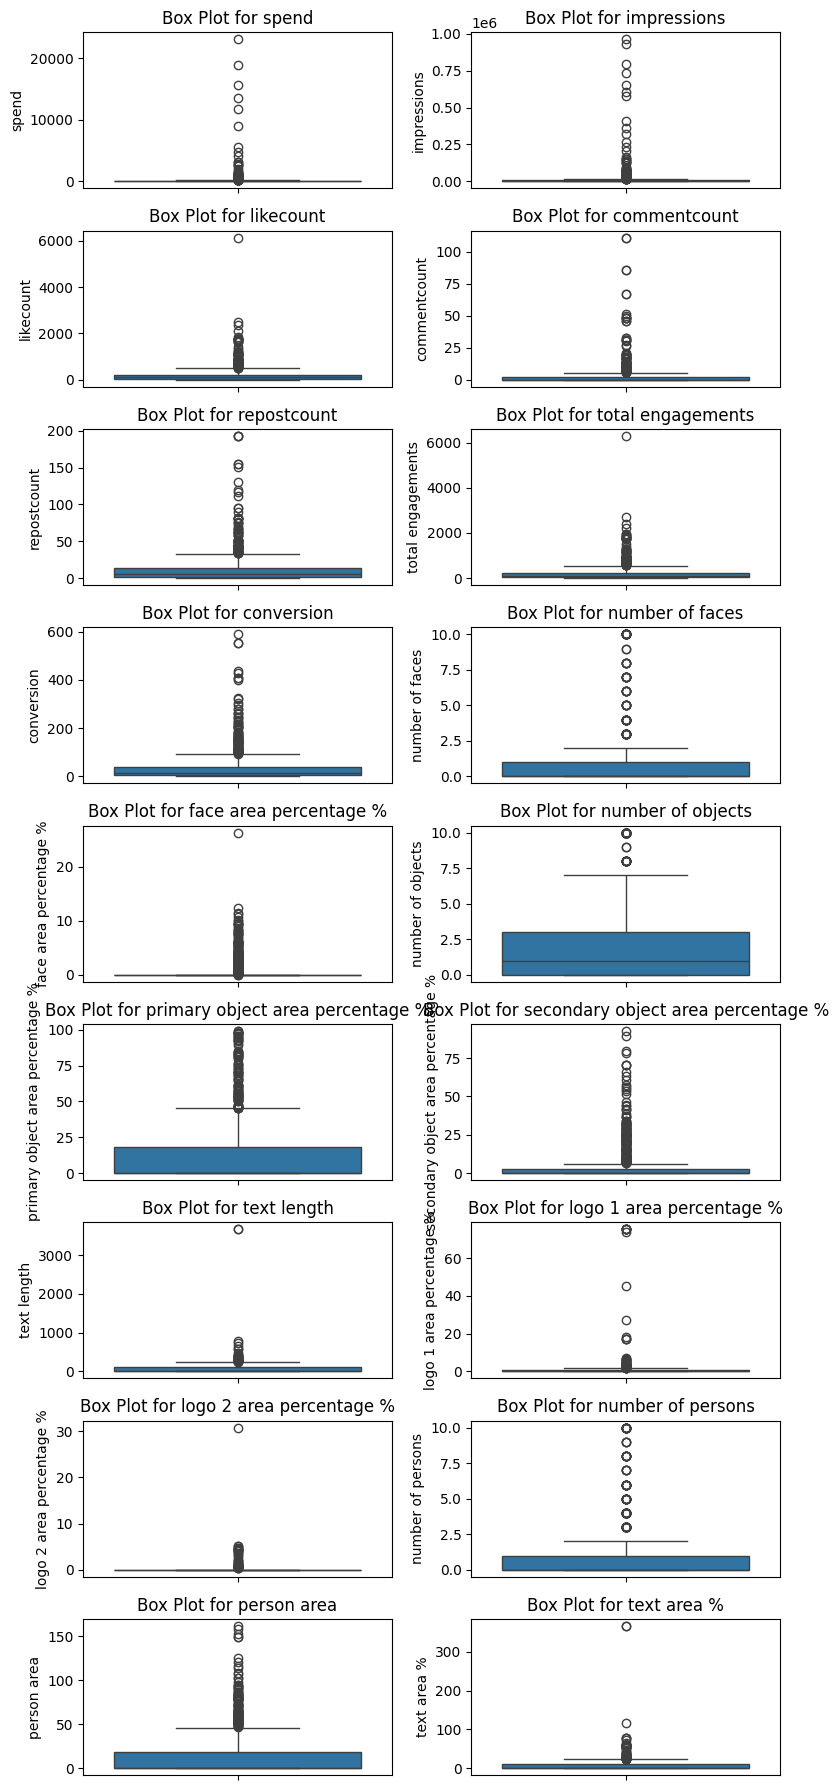

In [27]:
num_columns = len(numerical_columns)
num_rows = (num_columns + 1) // 2  

plt.figure(figsize=(8, num_rows * 2))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Various of the columns have outliers like- Likecount,Boxplot for text length etc

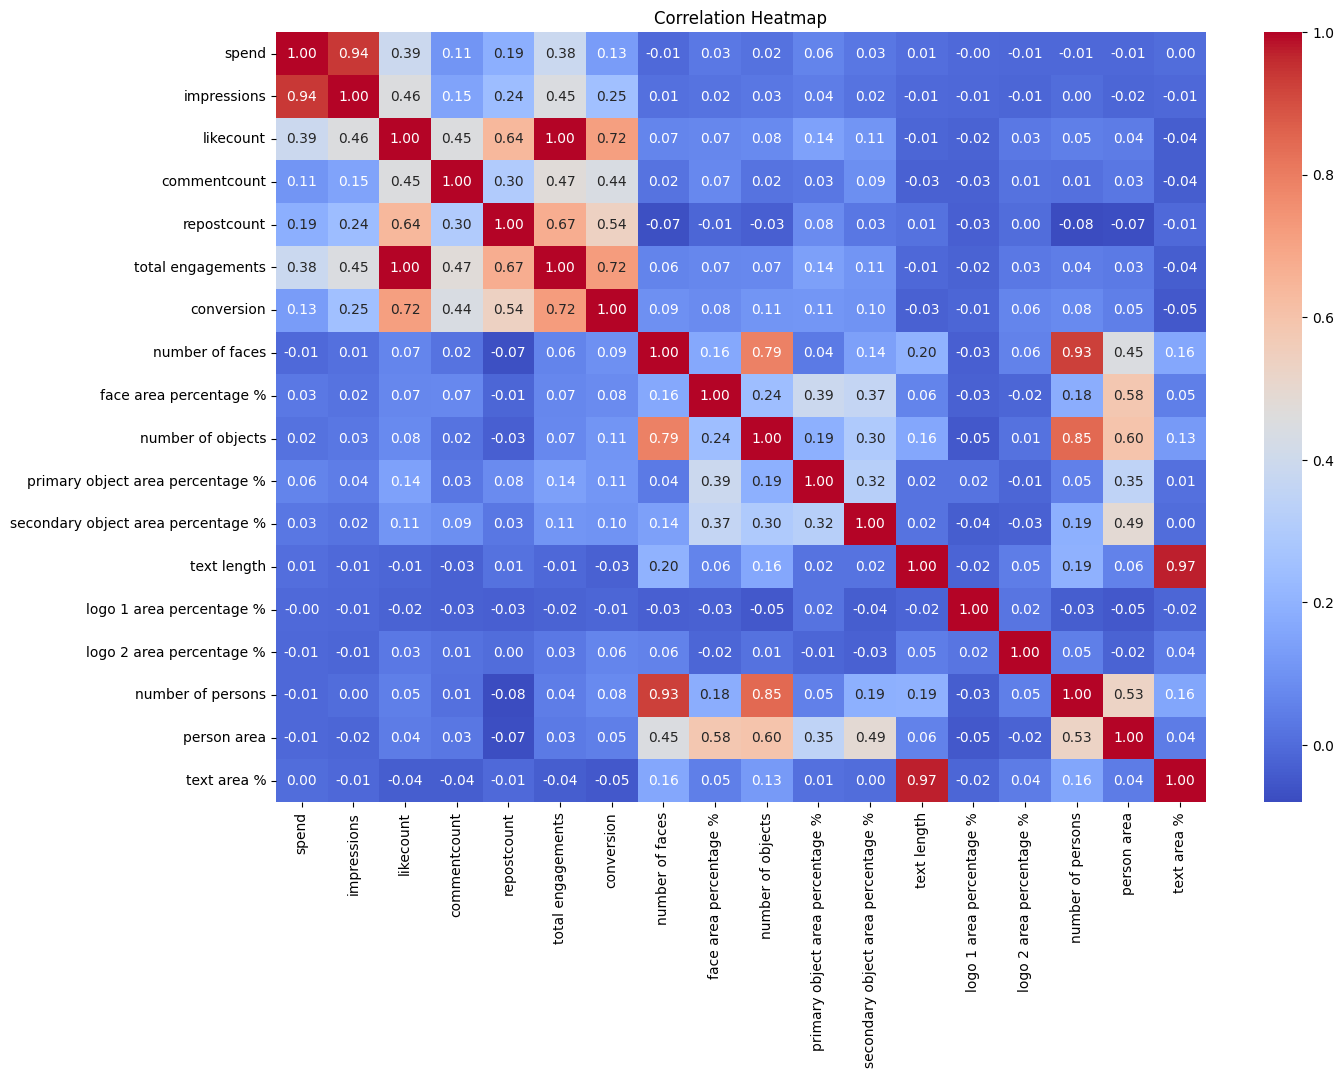

In [28]:
numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlation Plot gives us a clear idea of how various variables are related one one another

Feature Engineering:

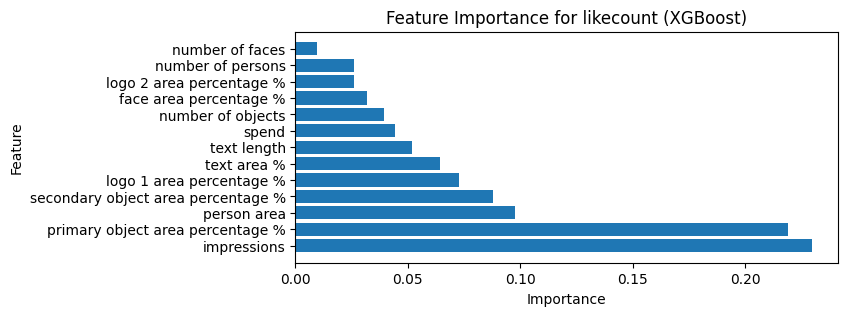

Selected Features for likecount: ['impressions', 'primary object area percentage %', 'person area', 'secondary object area percentage %', 'logo 1 area percentage %', 'text area %', 'text length']


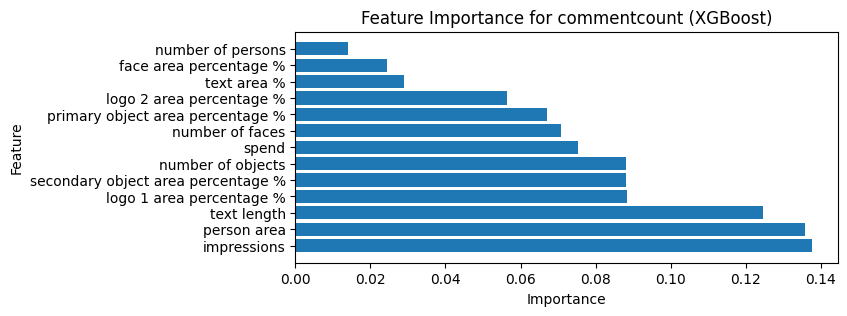

Selected Features for commentcount: ['impressions', 'person area', 'text length', 'logo 1 area percentage %', 'secondary object area percentage %', 'number of objects', 'spend', 'number of faces', 'primary object area percentage %', 'logo 2 area percentage %']


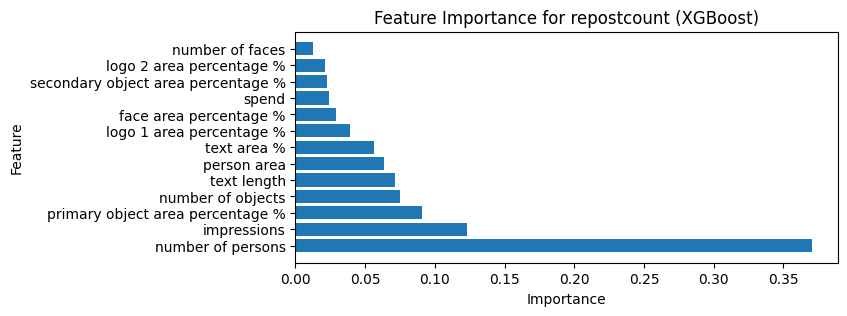

Selected Features for repostcount: ['number of persons', 'impressions', 'primary object area percentage %', 'number of objects', 'text length', 'person area', 'text area %']


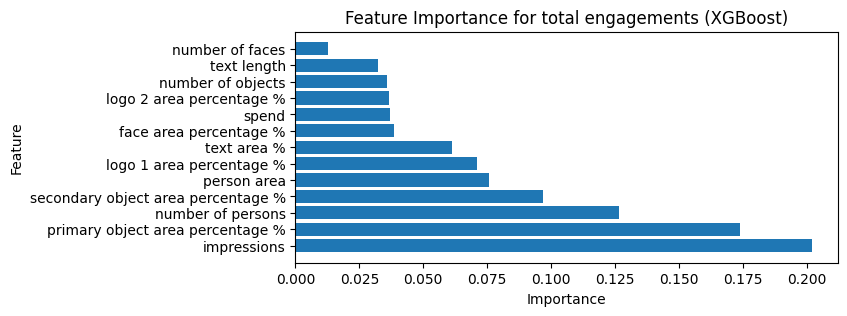

Selected Features for total engagements: ['impressions', 'primary object area percentage %', 'number of persons', 'secondary object area percentage %', 'person area', 'logo 1 area percentage %', 'text area %']


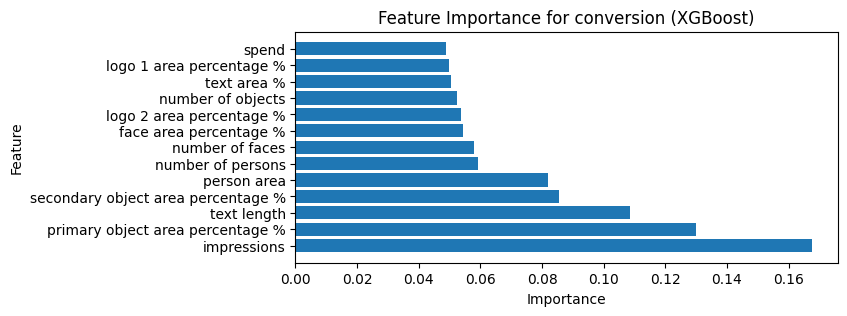

Selected Features for conversion: ['impressions', 'primary object area percentage %', 'text length', 'secondary object area percentage %', 'person area', 'number of persons', 'number of faces', 'face area percentage %', 'logo 2 area percentage %', 'number of objects', 'text area %']


In [29]:
target_variables = ['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']


numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

test = numerical_columns.copy()

for target_variable in target_variables:

    test.remove(target_variable)

for target_variable in target_variables:
    X = df[test]
    y = df[target_variable]

    model = xgb.XGBRegressor()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model.fit(X_scaled, y)

    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': test, 'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 3))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {target_variable} (XGBoost)')
    plt.show()

    threshold = 0.05

    selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

    X_selected = X[selected_features]

    print(f"Selected Features for {target_variable}:", selected_features.tolist())

By using XGBRegressor model we can identify the importance of various features and we can drop the features which do not pass the threshold

In [30]:
df= pd.read_csv(filename)

Having a column with the post content which is no doubt important, perform sentiment analysis which gives numerical values which can be used to fit the future model

In [31]:

analyzer = SentimentIntensityAnalyzer()

text_data = df['postcontent']

sentiment_scores = text_data.apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['sentiment_score_vader'] = sentiment_scores
numerical_columns.append('sentiment_score_vader')

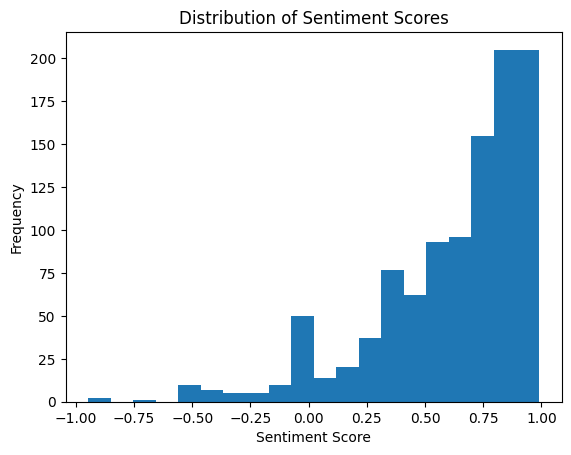

In [32]:
sentiment_scores = df['sentiment_score_vader']
plt.hist(sentiment_scores, bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

Splitting the date feature into Day and Time columns

C:\Users\akash\AppData\Local\Temp\ipykernel_7956\2714049141.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['created_at'] = pd.to_datetime(df['created_at'])


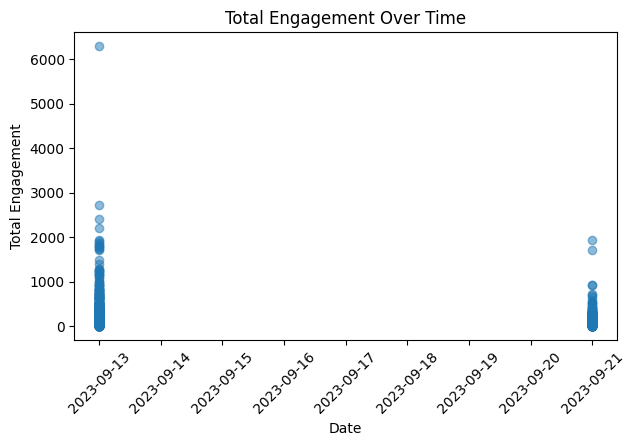

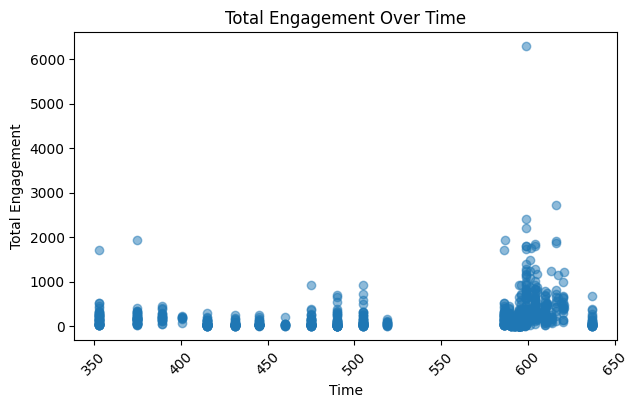

In [33]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date_main'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time
df['time_minutes'] = df['time'].apply(lambda t: t.hour * 60 + t.minute)
df['day_of_year'] = df['created_at'].dt.dayofyear

numerical_columns.append('day_of_year')
numerical_columns.append('time_minutes')

plt.figure(figsize=(7, 4))
plt.scatter(df['date_main'], df['total engagements'], alpha=0.5)
plt.title('Total Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(7, 4))
plt.scatter(df['time_minutes'], df['total engagements'], alpha=0.5)
plt.title('Total Engagement Over Time')
plt.xlabel('Time')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)  
plt.show()

In [34]:
day_to_numeric = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['day_name'] = df['created_at'].dt.strftime('%A')

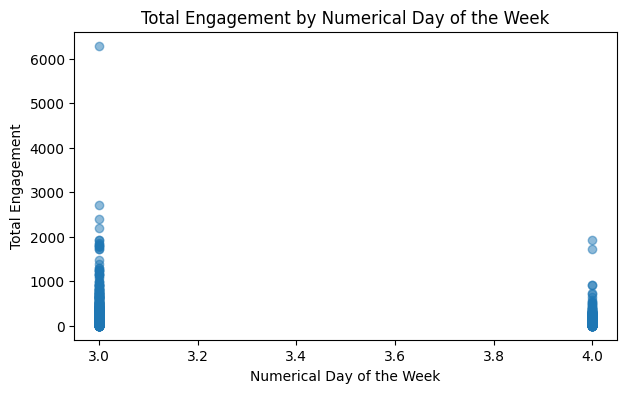

In [35]:
df['day_numeric'] = df['day_name'].map(day_to_numeric)
plt.figure(figsize=(7, 4))
plt.scatter(df['day_numeric'], df['total engagements'], alpha=0.5)
plt.title('Total Engagement by Numerical Day of the Week')
plt.xlabel('Numerical Day of the Week')
plt.ylabel('Total Engagement')
plt.show()

Splitting the size feature into Width and Height

In [36]:
df[['width', 'height']] = df['size'].str.split('x', expand=True)

df['width'] = pd.to_numeric(df['width'])
df['height'] = pd.to_numeric(df['height'])

Mapping different languages to different numerical values

In [37]:
df['language_map'] = df['language'].apply(lambda x: 1 if x == 'English' else 0)

Mapping different post types to different numerical values

In [38]:
type_mapping = {
    'Image': 1,
    'Document': 2,
    'Video (LinkedIn Source)': 3,
    'text': 4,
    'poll': 5,
    'Video (External Source)': 6,
    'Article': 7
}

df['type_mapped'] = df['type'].map(type_mapping)


Mapping various companies to different numerical values

In [39]:
company_mapping = {
    'schneider-electric': 1,
    'vertiv': 2,
    'rockwell-automation': 3,
    'ge': 4,
    'siemens': 5,
    'johnson-controls': 6,
    'abb': 7,
    'honeywell': 8
}

df['company_map'] = df['company name'].map(company_mapping)

Mapping different topics to different numerical values

In [40]:
category_mapping = {
    'Offerings': 1,
    'Sustainability': 2,
    'Digital Transformation': 3,
    'Cybersecurity': 4,
    'Employee Branding': 5,
    'Events': 6,
    'Brand': 7,
    'Diversity and Inclusion': 8,
    'AI': 9,
    'Hiring': 10
}

df['topic_map'] = df['topic'].map(category_mapping)

Dropping lesser important columns 

In [41]:
columns_to_drop = ['company name','created_at','date','action','url','posturl','sharedposturl','profileurl','videourl','type','text','postcontent','size','date_main','time','day_name','topic']

tf = df.drop(columns=columns_to_drop)

Encoding the catagorical columns with HotEncoder for checking importance

In [42]:
categorical_columns = ['dominant colour','objects','primary object', 'logos', 'logo 1 name', 'logo 2 name', 'logo 2 area percentage %','person area %','style', 'tone', 'voice', 'sentiment', 'empty space %','face position','cta', 'logo 1 position', 'logo 2 position','language','face emotion','primary object position','secondary object','secondary object position', 'logo 1 area percentage %','# faces','# persons','# objects','# text length']

tf_encoded = pd.get_dummies(tf, columns=categorical_columns)

In [43]:
target_variables = ['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
target_drop=['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion','spend','impressions','time_minutes', 'logo 1 area percentage %_1.025', 'sentiment_score_vader']

selected_features_dict = {}

for target_variable in target_variables:
    X = tf_encoded.drop(target_drop, axis=1)  
    y = tf_encoded[target_variable]

    X.fillna(0, inplace=True)
    model = RandomForestRegressor()

    model.fit(X, y)

    feature_importances = model.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    threshold = 0.05

    selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

    selected_features_dict[target_variable] = selected_features.tolist()

for target_variable, selected_features in selected_features_dict.items():
    print(f"Selected Features for {target_variable}:", selected_features)


Selected Features for likecount: ['company_map', 'dominant colour_teal', 'objects_Hat', 'height']
Selected Features for commentcount: ['company_map', 'topic_map', 'dominant colour_seagreen', 'type_mapped', 'day_numeric', 'objects_Scarf, Person, Outerwear']
Selected Features for repostcount: ['company_map', 'objects_Bridge, Building', 'cta_Open digital platforms for the industrial metaverse', 'topic_map']
Selected Features for total engagements: ['company_map', 'dominant colour_teal', 'objects_Hat', 'height']
Selected Features for conversion: ['company_map', 'objects_Person, Person, Pants, Pants, Building']


Dropping lesser important columns 

In [44]:
columns_to_drop = ['topic','language','company name','number of faces','logo 2 name','day_of_year','created_at','date','action','url','posturl','sharedposturl','profileurl','videourl','type','postcontent','size','date_main','time','day_name','face position','cta', 'logo 1 position', 'logo 2 position','face emotion','primary object position','secondary object position','# faces','# persons','# objects','# text length']
data = df.drop(columns=columns_to_drop)

Splitting columns into numerical and catagorical columns

In [45]:
column_data_types = data.dtypes
categorical_columns = []
numerical_columns = []
for column_name, data_type in column_data_types.items():
    if data_type == 'object' or data_type.name == 'category':
        categorical_columns.append(column_name)
    else:
        numerical_columns.append(column_name)

print(numerical_columns)
print(categorical_columns)


['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion', 'face area percentage %', 'number of objects', 'primary object area percentage %', 'secondary object area percentage %', 'text length', 'logo 1 area percentage %', 'logo 2 area percentage %', 'number of persons', 'person area', 'text area %', 'sentiment_score_vader', 'time_minutes', 'day_numeric', 'width', 'height', 'language_map', 'type_mapped', 'company_map', 'topic_map']
['objects', 'primary object', 'secondary object', 'text', 'dominant colour', 'logos', 'logo 1 name', 'person area %', 'style', 'tone', 'voice', 'sentiment', 'empty space %']


Checking the accuracy of various models for predicitng the target variables

In [46]:

target_variables = ['likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']

data_copy = data.copy()
label_encoder = LabelEncoder()

for col in categorical_columns:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

X = pd.concat([data[numerical_columns],data_copy[categorical_columns]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data[target_variables], test_size=0.2, random_state=42)

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

X_test=X_test.drop(target_variables,axis=1)
X_train=X_train.drop(target_variables,axis=1)

models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR())
]

for target_variable in target_variables:
    print(f"Mean Absolute Error for {target_variable}:")
    print()
    for model_name, model in models:
        model.fit(X_train, y_train[target_variable])
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test[target_variable], y_pred)
        print(f"{model_name}: {mae}")
        print()


Mean Absolute Error for likecount:

RandomForest: 94.27421800947867

GradientBoosting: 96.8036717932498

XGBoost: 93.04953315133731

SVR: 154.0220407615611

Mean Absolute Error for commentcount:

RandomForest: 3.335308056872038

GradientBoosting: 3.1130181191829736

XGBoost: 3.3790877723301675

SVR: 3.2010497267174545

Mean Absolute Error for repostcount:

RandomForest: 7.1821327014218

GradientBoosting: 8.149884867385262

XGBoost: 7.093305234589848

SVR: 8.056798071503431

Mean Absolute Error for total engagements:

RandomForest: 101.04620853080569

GradientBoosting: 109.3998758242154

XGBoost: 108.49812916436748

SVR: 165.14093647158896

Mean Absolute Error for conversion:

RandomForest: 26.18734597156398

GradientBoosting: 26.177610102723886

XGBoost: 28.58371773856511

SVR: 27.993671884116907



In [47]:
columns_to_drop = ['language','company name','number of faces','logo 2 name','day_of_year','created_at','date','action','url','posturl','sharedposturl','profileurl','videourl','type','postcontent','size','date_main','time','day_name','face position','cta', 'logo 1 position', 'logo 2 position','face emotion','primary object position','secondary object position','# faces','# persons','# objects','# text length']
data = df.drop(columns=columns_to_drop)

Using the most accurate model- XGBRegressor and a MultiOutputRegressor as we need to predict 4 columns 

In [48]:
from sklearn.multioutput import MultiOutputRegressor

base_regressor = XGBRegressor()

model = MultiOutputRegressor(base_regressor)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

for i, target_variable in enumerate(target_variables):
    print(f"Mean Absolute Error for {target_variable}: {mae[i]}")

Mean Absolute Error for likecount: 93.04953315133731
Mean Absolute Error for commentcount: 3.3790877723301675
Mean Absolute Error for repostcount: 7.093305234589848
Mean Absolute Error for total engagements: 108.49812916436748
Mean Absolute Error for conversion: 28.58371773856511


The model for prediction has succesfully been will be used to predict the test data

Working on the Test Data and repeating all the preprocessing steps-

In [49]:
analyzer = SentimentIntensityAnalyzer()

text_data = new_data['postcontent']

sentiment_scores = text_data.apply(lambda text: analyzer.polarity_scores(text)['compound'])

new_data['sentiment_score_vader'] = sentiment_scores


In [50]:
new_data['created_at'] = pd.to_datetime(new_data['created_at'])
new_data['date_main'] =new_data['created_at'].dt.date
new_data['time'] = new_data['created_at'].dt.time
new_data['time_minutes'] = new_data['time'].apply(lambda t: t.hour * 60 + t.minute)
new_data['day_of_year'] = new_data['created_at'].dt.dayofyear


C:\Users\akash\AppData\Local\Temp\ipykernel_7956\3785520624.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_data['created_at'] = pd.to_datetime(new_data['created_at'])


In [51]:
day_to_numeric = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
new_data['day_name'] = new_data['created_at'].dt.strftime('%A')
new_data['day_numeric'] = new_data['day_name'].map(day_to_numeric)

In [52]:
new_data[['width', 'height']] = new_data['size'].str.split('x', expand=True)

new_data['width'] = pd.to_numeric(new_data['width'])
new_data['height'] = pd.to_numeric(new_data['height'])

In [53]:
new_data['language_map'] = new_data['language'].apply(lambda x: 1 if x == 'English' else 0)

In [54]:
type_mapping = {
    'Image': 1,
    'Document': 2,
    'Video (LinkedIn Source)': 3,
    'text': 4,
    'poll': 5,
    'Video (External Source)': 6,
    'Article': 7
}

new_data['type_mapped'] = new_data['type'].map(type_mapping)

In [55]:
company_mapping = {
    'schneider-electric': 1,
    'vertiv': 2,
    'rockwell-automation': 3,
    'ge': 4,
    'siemens': 5,
    'johnson-controls': 6,
    'abb': 7,
    'honeywell': 8
}

new_data['company_map'] = new_data['company name'].map(company_mapping)

In [56]:
category_mapping = {
    'Offerings': 1,
    'Sustainability': 2,
    'Digital Transformation': 3,
    'Cybersecurity': 4,
    'Employee Branding': 5,
    'Events': 6,
    'Brand': 7,
    'Diversity and Inclusion': 8,
    'AI': 9,
    'Hiring': 10
}

new_data['topic_map'] = new_data['topic'].map(category_mapping)

In [57]:
columns_to_drop = ['topic','logo 2 name','logo 1 position','logo 2 position','day_of_year','language', '# faces','# persons', '# objects', '# text length','cta','secondary object position','primary object position','number of faces','date','company name','created_at','date','action','url','posturl','sharedposturl','profileurl','videourl','type','postcontent','size','date_main','time','day_name', 'face emotion', 'face position']
new_data_predict = new_data.drop(columns=columns_to_drop)
new_data_predict.fillna(0, inplace=True)
new_data_predict.columns

Index(['spend', 'impressions', 'likecount', 'commentcount', 'repostcount',
       'total engagements', 'conversion', 'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'logos', 'logo 1 name', 'logo 1 area percentage %',
       'logo 2 area percentage %', 'number of persons', 'person area %',
       'person area', 'style', 'tone', 'voice', 'sentiment', 'text area %',
       'empty space %', 'sentiment_score_vader', 'time_minutes', 'day_numeric',
       'width', 'height', 'language_map', 'type_mapped', 'company_map',
       'topic_map'],
      dtype='object')

In [58]:
column_data_types = new_data_predict.dtypes
categorical_columns = []
numerical_columns = []
new_data_predict['likecount'] = pd.to_numeric(new_data_predict['likecount'], errors='coerce')
for column_name, data_type in column_data_types.items():
  
    if data_type == 'object' or data_type.name == 'category':
        categorical_columns.append(column_name)
    else:
        numerical_columns.append(column_name)
print(numerical_columns)
print(categorical_columns)


['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion', 'face area percentage %', 'number of objects', 'primary object area percentage %', 'secondary object area percentage %', 'text length', 'logo 1 area percentage %', 'logo 2 area percentage %', 'number of persons', 'person area', 'text area %', 'sentiment_score_vader', 'time_minutes', 'day_numeric', 'width', 'height', 'language_map', 'type_mapped', 'company_map', 'topic_map']
['objects', 'primary object', 'secondary object', 'text', 'dominant colour', 'logos', 'logo 1 name', 'person area %', 'style', 'tone', 'voice', 'sentiment', 'empty space %']


In [59]:
data_copy = new_data_predict.copy()

data_copy[categorical_columns] = data_copy[categorical_columns].astype(str)
label_encoder = LabelEncoder()

for col in categorical_columns:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

X = pd.concat([new_data_predict[numerical_columns],data_copy[categorical_columns]], axis=1)

In [60]:
X=X.drop(target_variables,axis=1)
X.fillna('0', inplace=True)

Fitting the new data with are already created model

In [61]:
y_pred = model.predict(X)
y_pred_df = pd.DataFrame(y_pred, columns=target_variables)
print(y_pred_df.head())

    likecount  commentcount  repostcount  total engagements  conversion
0   45.865154      0.837655     4.581430          43.810505   25.563484
1   15.432829     -0.615398     1.099675         -18.866022   18.778473
2   60.149616      2.067361    14.787930         102.910347   15.730192
3   45.207829      0.494383    11.508564          77.486366    7.734579
4  112.472900      1.288686    -0.378573         155.418488   37.787048


Concat of the predicting columns and X

In [62]:
result = pd.concat([y_pred_df,X], axis=1)
result.head()

,likecount,commentcount,repostcount,total engagements,conversion,spend,impressions,face area percentage %,number of objects,primary object area percentage %,...,text,dominant colour,logos,logo 1 name,person area %,style,tone,voice,sentiment,empty space %
0,45.865154,0.837655,4.581430,43.810505,25.563484,4.03,520,0.202153,6.0,7.445867,...,30,11,0,0,2,1,1,1,2,3
1,15.432829,-0.615398,1.099675,-18.866022,18.778473,0.52,74,5.311914,7.0,57.053548,...,2,11,0,0,1,0,0,0,0,0
2,60.149616,2.067361,14.787930,102.910347,15.730192,1.10,256,0.000000,0.0,0.000000,...,15,4,9,9,0,1,1,1,2,3
3,45.207829,0.494383,11.508564,77.486366,7.734579,3.07,600,1.960000,5.0,11.207013,...,19,7,0,0,2,0,0,0,0,3
4,112.472900,1.288686,-0.378573,155.418488,37.787048,25.60,1267,0.443182,10.0,14.667771,...,39,8,0,0,1,1,1,1,2,3


Converting the predicted data back into a csv for easier use 

In [63]:
csv_file_path = r"C:\Users\akash\Desktop\result.csv"
result.to_csv(csv_file_path, index=False)